In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
mdf = pd.read_csv('F:/Mall Dataset/Mall_customers.csv')


In [3]:
mdf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [4]:
mdf.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

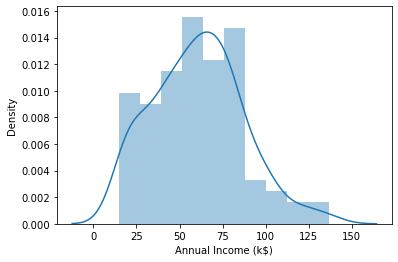

In [5]:
# Distribution plot for annual income using sns library 
sns.distplot(mdf['Annual Income (k$)'])

In [6]:
mdf.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

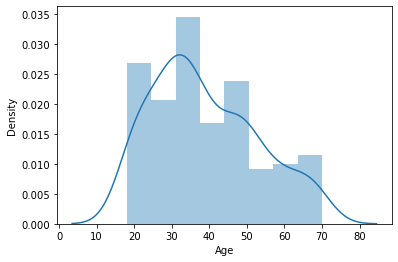

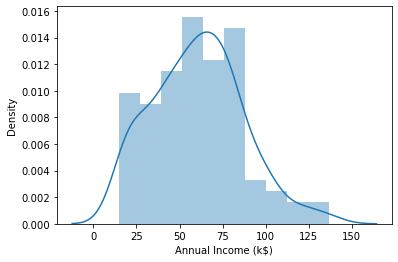

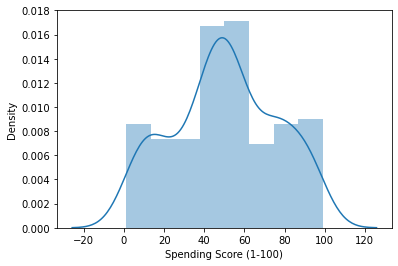

In [14]:
# Using for loop and creating different plots using list 
listcol = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in listcol:
    plt.figure()
    sns.distplot(mdf[i])


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

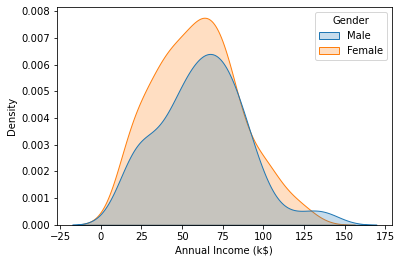

In [17]:
sns.kdeplot(mdf['Annual Income (k$)'],shade=True,hue=mdf['Gender'])

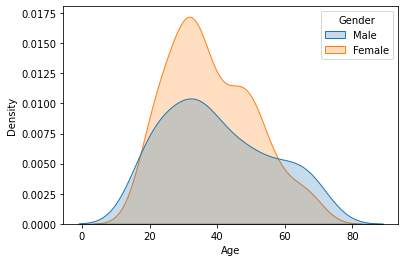

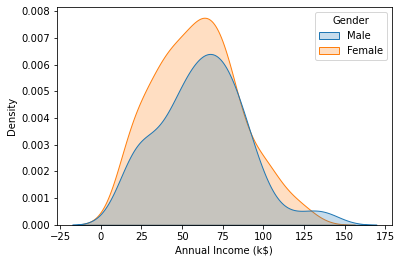

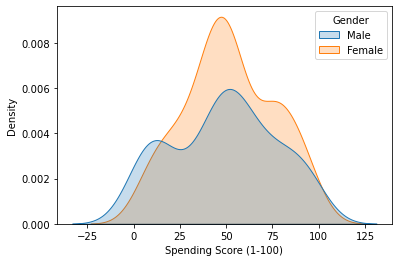

In [18]:
listcol = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in listcol:
    plt.figure()
    sns.kdeplot(mdf[i],shade=True,hue=mdf['Gender'])
    
# We see more frequency of female in the age group of 20-40 years and males have less frequency and the curve is flattened 

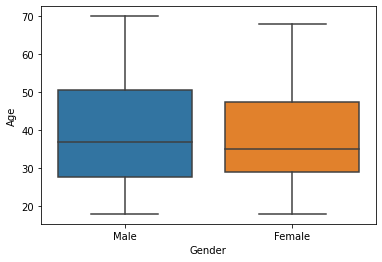

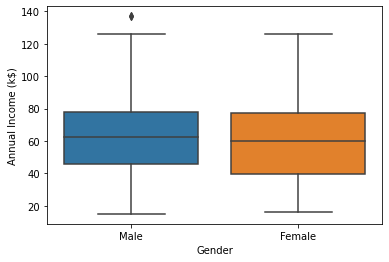

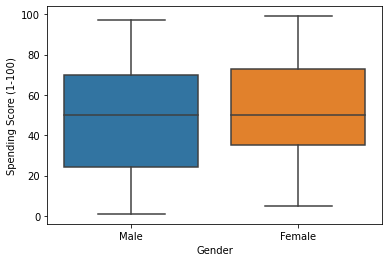

In [20]:
#creating box plots , Analysis: Male lies between age of 30 years to 50 years, Median is hgher for male when compared to females 
# Annual income we can see an outlier in male plot as we saw in Kde plot and frequency of females is more ,
# similarly spending score is seen is more by males than females 
listcol = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in listcol:
    plt.figure()
    sns.boxplot(data=mdf, x='Gender',y=mdf[i])

In [23]:
# Females are more than males as seen in the plots. To check this use fnction value_counts()
mdf['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [24]:
#To get % value for each column ,use normalise =True 
mdf['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis 

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

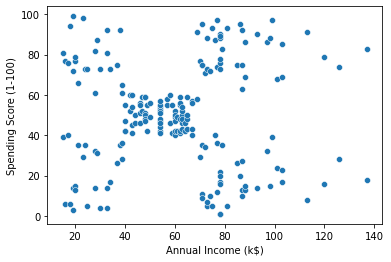

In [26]:
# when we use 2 variables for analysis we will use scatter plot 

sns.scatterplot(data=mdf,x='Annual Income (k$)',y='Spending Score (1-100)')

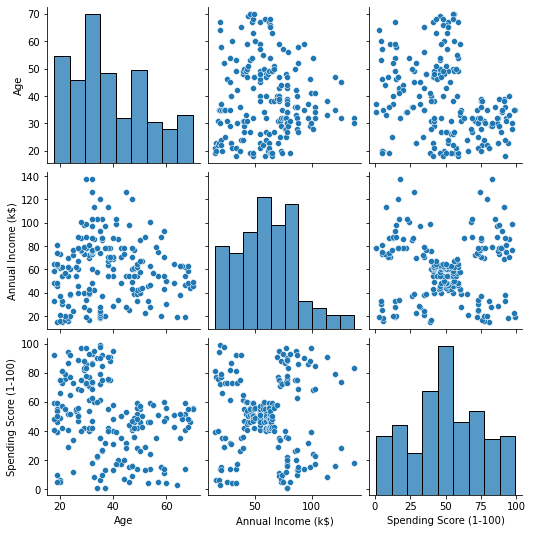

In [29]:
# Drop customer ID as doesnt give much insights.(axis=1 is drop from columns, axis =0 is drop from rows) 
#Pairplot gives us some histogram and scatterplots together 
mdf =mdf.drop('CustomerID',axis=1)
sns.pairplot(mdf);

In [32]:
# Group by function used to see insights through mean values. Age is almost similar , 
# Male has slightly higher income and females have slightly higher spending scores compared to males 
mdf.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [33]:
# Check correlation between the variables. Analysis shows Age has a negative correlation with annual income and spending score 
# Annual income has slighlty positive correlation with spending score 
mdf.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

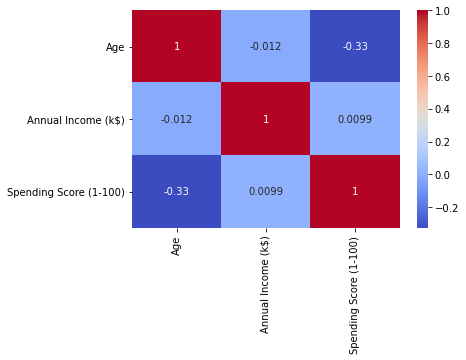

In [34]:
# We can create a heatmap to see correlation between variables instead of a tabular form 
sns.heatmap(mdf.corr(),annot=True,cmap='coolwarm')

# Clustering-Univariate,Bivariate,Multivariate

In [57]:
cluster1 =KMeans(n_clusters=3)

In [58]:
cluster1.fit(mdf[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [59]:
cluster1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [60]:
mdf['Income Cluster']= cluster1.labels_
mdf.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [61]:
mdf['Income Cluster'].value_counts()

0    92
2    72
1    36
Name: Income Cluster, dtype: int64

In [62]:
# To get appropraite clusters have used elbow method . 
#caluclated the inertia of the cluster (distance between the centroids should be relatively low so will use elbow method)
cluster1.inertia_

23528.152173913048

In [63]:
inertia_scores=[]
for i in range(1,11):
    kmeans =KMeans(n_clusters=i)
    kmeans.fit(mdf[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [64]:
inertia_scores

[137277.2800000002,
 48660.88888888887,
 23528.152173913048,
 13278.112713472474,
 8481.49619047619,
 5050.904761904766,
 3941.41636141636,
 2836.339987789987,
 2171.4722222222226,
 1745.875174825175]

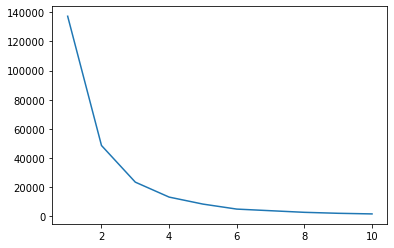

In [65]:
plt.plot(range(1,11),inertia_scores);
#The elbow plot below shows we should go ahead with 3 clusters as elbow starts at 3 

In [66]:
mdf.groupby(['Income Cluster'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.184783,66.717391,50.054348
1,37.833333,99.888889,50.638889
2,38.930556,33.027778,50.166667


In [112]:
#Bivariate Clustering 
cluster2 =KMeans(n_clusters=5)
cluster2.fit(mdf[['Annual Income (k$)','Spending Score (1-100)']])
mdf['Spending and Income Cluster']= cluster2.labels_
mdf.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,4
1,Male,21,15,81,2,1
2,Female,20,16,6,2,4
3,Female,23,16,77,2,1
4,Female,31,17,40,2,4


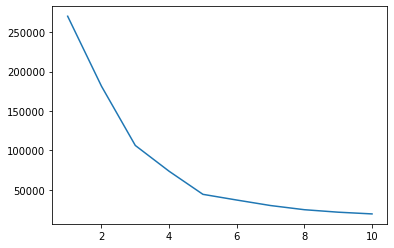

In [113]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2 =KMeans(n_clusters=i)
    kmeans2.fit(mdf[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2);

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

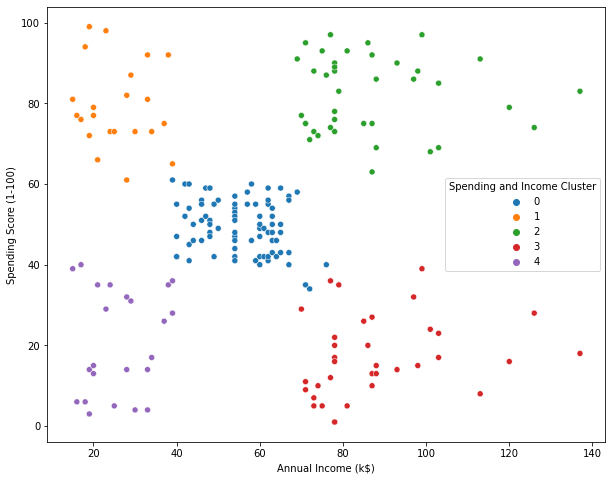

In [114]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=mdf,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')

In [117]:
#Generating more insights 
pd.crosstab(mdf['Spending and Income Cluster'],mdf['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.590909,0.409091
2,0.538462,0.461538
3,0.457143,0.542857
4,0.608696,0.391304


In [118]:
mdf.groupby(['Spending and Income Cluster'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,25.272727,25.727273,79.363636
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [ ]:
# Analysis : Cluster 1& 2 - young age but spending capacity is more and income also is high
#segment is dominated by females rather than males,but its a small % , a marketing campaign should be done around them and check customer ID 
# to check which products are purchased by these consumers.Segment 2 young age less income but high spending capacity

In [91]:
#Multivariate Analysis
from sklearn.preprocessing import StandardScaler

In [92]:
scale =StandardScaler()

In [93]:
mdf.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,2
1,Male,21,15,81,2,0
2,Female,20,16,6,2,2
3,Female,23,16,77,2,0
4,Female,31,17,40,2,2


In [94]:
mdf1=pd.get_dummies(mdf,drop_first=True)
mdf1.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,2,2,1
1,21,15,81,2,0,1
2,20,16,6,2,2,0
3,23,16,77,2,0,0
4,31,17,40,2,2,0


In [95]:
mdf1.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [96]:
mdf1 = mdf1[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
mdf1

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [97]:
mdf1 = scale.fit_transform(mdf1)
mdf1

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

In [99]:
mdf1 = pd.DataFrame(scale.fit_transform(mdf1))
mdf1.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


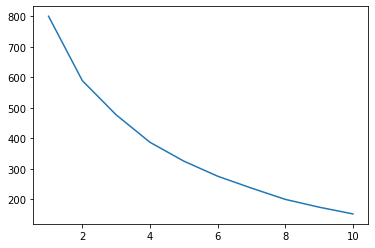

In [108]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3 =KMeans(n_clusters=i)
    kmeans3.fit(mdf1)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3);